孤立ノードの数: 1


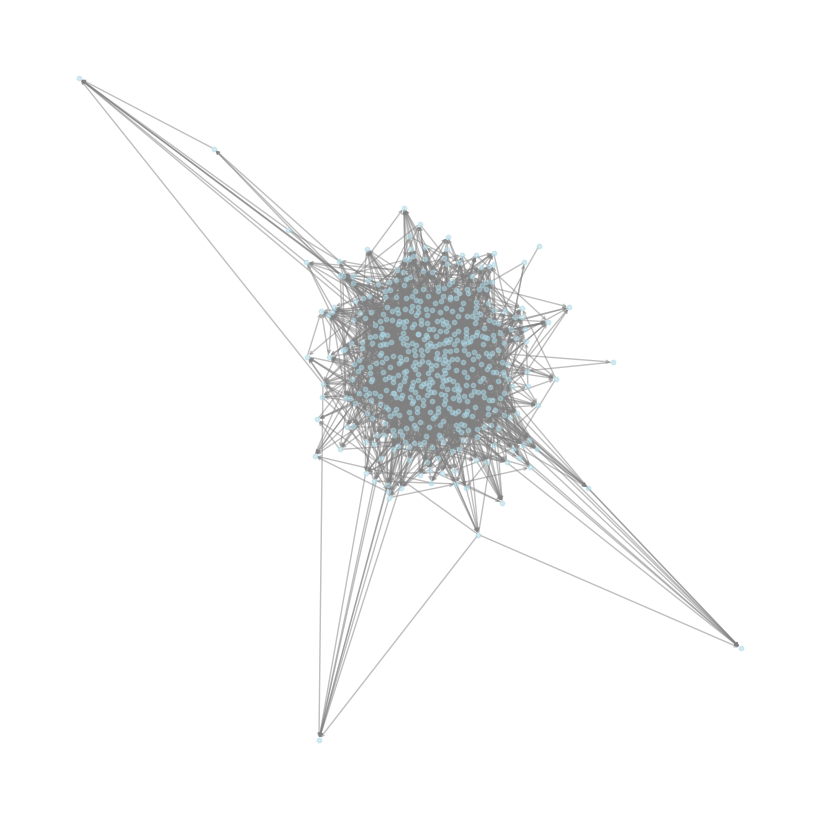

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルから隣接行列を読み込む
adj_matrix = pd.read_csv('adjacency_matrix.csv', header=None).values

# NetworkXのグラフに変換する（有向グラフ）
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# 孤立ノードを除外する
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# 孤立ノードの数を報告
print(f"孤立ノードの数: {len(isolated_nodes)}")

# レイアウトを計算（spring_layoutなども試せる）
# kパラメータを小さくしてノードを密集させる
pos = nx.spring_layout(G, seed=42, k=0.1)  # kを小さくするとノードが密集

# 描画のための設定
plt.figure(figsize=(8, 8))  # 図のサイズを設定

# ノード数が多い場合、ノードサイズをさらに小さく
node_size = 10  # 小さくしたいので10に設定

# 有向グラフとして矢印を描画
nx.draw(
    G, pos, 
    node_size=node_size, 
    with_labels=False, 
    node_color="lightblue", 
    edge_color="gray", 
    alpha=0.5,
    arrows=True,  # 矢印を描画
    arrowstyle='->',  # 矢印スタイル
    arrowsize=5  # 矢印のサイズ
)

# グラフを表示
plt.show()
